<a href="https://colab.research.google.com/github/robb2828/fournier-coding/blob/main/assignment2_RF_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


![download.jpeg](attachment:download.jpeg)

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [84]:
# First, importing dependencies
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
# Building the simulation

def monty_hall(STRATEGY):
  '''
  A simple simulation function to perform several logical steps to simulate the
  Monty Hall problem. First, randomly assigning a car and 2 goats to 3 doors. 
  Then randomly selecting a door for the player. Then having Monty select a door 
  with a goat to open and remove. Finally, the player will either keep the door 
  or change, depending on their defined input strategy. 

  PARAMS:
    STRATEGY: str, either 'first_door' or 'second_door'. If 'first_door', the
              player will keep the first door they choose and not switch after
              1 door is revealted. If 'second_door', they will switch to the 
              unopened door offered by Monty.
  
  RETURNS:
    int:      1, 0. If the player has selected a door with a car, the function 
              will return a 1. If the player selected a door with a goat, the
              function returns a 0.
  '''

  # Setting up the 3 doors and shuffling them
  DOORS = ['CAR', 'GOAT', 'GOAT']
  random.shuffle(DOORS)

  # The player picks the first door at random
  first_door_pick = random.randint(0,2)
  first_pick = DOORS[first_door_pick] 

  # That door is removed from the list
  DOORS.pop(first_door_pick)

  # If there is more than 1 goat remaining, Monty selects one door at random to
  # open. If there is one goat, that door is opened
  if len([door for door in DOORS if door == 'GOAT']) > 1:
    monty_pick = random.randint(0,1)
  else:
    monty_pick = DOORS.index('GOAT')
  DOORS.pop(monty_pick)

  # The last door is defined, where it will be either 'CAR' or 'GOAT'
  other_door = DOORS[0]

  # Depending on the user strategy input to the function, it will check either
  # the first door picked, or the last door that Monty offered.
  if STRATEGY == 'first_door' and first_pick == 'CAR':
    return 1
  elif STRATEGY == 'second_door' and other_door == 'CAR':
    return 1
  else:
    return 0

In [86]:
# Code to run the simulation and log the results

# Using simple counters
FIRST_DOOR_STRATEGY = 0
SECOND_DOOR_STRATEGY = 0

# Set the number of simulations to run
SIMULATIONS = 1000

# For the number of simulations, perform the function for each strategy
# This will log each car selected and add it to the running total for that strategy
for i in range(SIMULATIONS):
  FIRST_DOOR_STRATEGY += monty_hall('first_door')
  SECOND_DOOR_STRATEGY += monty_hall('second_door')

# Print the results
print(f"Out of {SIMULATIONS} simulations, keeping the first door resulted in {FIRST_DOOR_STRATEGY} cars")
print(f"And out of {SIMULATIONS} simulations, changing doors resulted in {SECOND_DOOR_STRATEGY} cars")

Out of 1000 simulations, keeping the first door resulted in 350 cars
And out of 1000 simulations, changing doors resulted in 675 cars


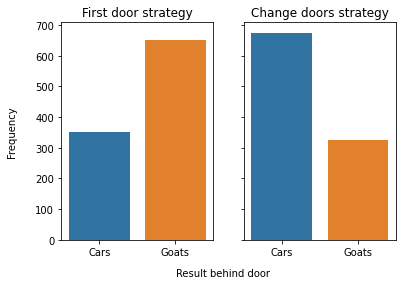

In [87]:
# Quick visualization of the results

fig, ax = plt.subplots(1,2, sharey=True)

sns.barplot(x=['Cars', 'Goats'],
            y=[FIRST_DOOR_STRATEGY, 1000-FIRST_DOOR_STRATEGY],
            ax=ax[0])
ax[0].title.set_text("First door strategy")

sns.barplot(x=['Cars', 'Goats'],
            y=[SECOND_DOOR_STRATEGY, 1000-SECOND_DOOR_STRATEGY],
            ax=ax[1])
ax[1].title.set_text("Change doors strategy")
fig.text(0,0.5,"Frequency",va='center',rotation='vertical')
fig.text(0.5,0,"Result behind door", ha="center")
plt.show()

Now, we'll proceed to calculate the posterior using Bayes' theory and formula.

First, our hypotheses:

* *Hypothesis A*: Keeping the first door is more likely to result in a car.
* *Hypothesis B*: Changing the door is more likely to result in a car.

First, the components of Bayes' formula:

* *P(first_door)* = 1/3
* *P(second_door)* = 1/3
* *P(Car|first_door)* = 367/1000
* *P(Car|second_door)* = 662/1000
* *P(Goat|first_door)* = 633/1000
* *P(Goat|second_door)* = 338/1000

Now, we can plug them into Bayes' formula.


In [88]:
# Code to run Bayes' formula and determine the probability of the posterior for
# each of the two defined hypotheses

# There are 3 doors, so the prior probability for each door is 1/3
p_first_door = 1/3 
p_second_door = 1/3

# We've calculated the probability of a car in the last segment
p_car_first_door = FIRST_DOOR_STRATEGY/SIMULATIONS
p_car_second_door = SECOND_DOOR_STRATEGY/SIMULATIONS

# Now we're doing the reverse and getting the probability of a goat in each strategy
p_goat_first_door = (SIMULATIONS-FIRST_DOOR_STRATEGY)/SIMULATIONS
p_goat_second_door = (SIMULATIONS-SECOND_DOOR_STRATEGY)/SIMULATIONS

# Now we will run the Bayes' formula for each hypothesis, calculating the numerator
# for the formula for both hypotheses before calculating the posterior

# Hypothesis A
p_dh_a = (p_car_first_door * p_goat_second_door * p_first_door)

# Hypothesis B
p_dh_b = (p_car_second_door * p_goat_first_door * p_second_door)

# The normalizing constant is the same for both hypotheses
p_d = p_dh_a + p_dh_b

# Posteriors for both hypotheses
posterior_a = p_dh_a / p_d
posterior_b = p_dh_b / p_d

print(f"The probability of hypothesis A is {posterior_a:.02f}")
print(f"The probability of hypothesis B is {posterior_b:.02f}")

The probability of hypothesis A is 0.21
The probability of hypothesis B is 0.79


Based on Bayes' theorem, the probability of selecting a car is significantly greater when you elect a change door strategy and move to the second door. 